# <center>  Watson Visual Recognition Service on IBM Cloud

### Table of contents
1. watson_developer_cloud package
2. Getting your Watson Visual Recognition API Key
3. Detecting Faces with Watson
4. Classifying objects with Watson
5. Creating custom image classifiers

## [IBM Watson APIs](https://cocl.us/mI2qq):
- [**Visual Recognition**](https://cocl.us/watsonvr_dsbootcampukr) ([API docs](https://cocl.us/watsonvrapidoc), [GUI](https://cocl.us/watsonvrtool))
- [Conversation](https://cocl.us/watsonchatbot) (Chatbots)
- [Language translator](https://cocl.us/watsontranslator)
- [Speech to Text](https://cocl.us/watsonstt)
- [Text to Speech](https://cocl.us/watsontts)
- ... and [more](https://cocl.us/watsonservices)

#### Install watson_developer_cloud package

Github: https://github.com/watson-developer-cloud

In [1]:
!pip install --upgrade watson-developer-cloud

  Running setup.py bdist_wheel for watson-developer-cloud: started
  Running setup.py bdist_wheel for watson-developer-cloud: finished with status 'done'
  Stored in directory: C:\Users\IBM_ADMIN\AppData\Local\pip\Cache\wheels\55\88\21\cb29765bf78642727d378cf82a0896aadd2922a3b471a68a20
Successfully built watson-developer-cloud
  Found existing installation: websocket-client 0.47.0
    Uninstalling websocket-client-0.47.0:
      Successfully uninstalled websocket-client-0.47.0
  Found existing installation: watson-developer-cloud 2.2.2
    Uninstalling watson-developer-cloud-2.2.2:
      Successfully uninstalled watson-developer-cloud-2.2.2


In [2]:
!pip show watson_developer_cloud

Name: watson-developer-cloud
Version: 2.5.2
Summary: Client library to use the IBM Watson Services
Home-page: https://github.com/watson-developer-cloud/python-sdk
Author: Jeffrey Stylos
Author-email: jsstylos@us.ibm.com
License: Apache 2.0
Location: c:\users\ibm_admin\anaconda3\lib\site-packages
Requires: websocket-client, python-dateutil, requests
Required-by: 


#### Import libraries

In [3]:
from watson_developer_cloud import VisualRecognitionV3
from pprint import pprint
from os import listdir
from os.path import isfile, join
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
try:
    import cv2
except:
    !pip install opencv-python

def plt_show(image, title="", size = (12,10)):
    #function to plot images cleanly
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rcParams['figure.figsize'] = size[0], size[1]
    plt.axis("off")
    plt.title(title)
    plt.imshow(image, cmap="Greys_r")
    plt.show()

### How to get your own [Watson Visual Recognition API Key](https://cocl.us/watsonvr):

1. Click on "Get Started Free" in the Watson Visual Recognition page:
  > https://cocl.us/watsonvr
2. In the Bluemix catalog, find the **Visual Recognition service** under the "Watson" category, and then, as in the screenshot below, click "Create Service":
<img src = https://ibm.box.com/shared/static/5ucr87a4nhdy0u1kpvkip4cv3p1k9bda.png width = 600>
3. Once you have created the service, you can now access it via your dashboard: [https://console.bluemix.net/dashboard/](https://console.bluemix.net/dashboard/services?env_id=ibm:yp:us-south)
4. To get your API Key, follow the instructions in the screenshot below:
<img src = https://ibm.box.com/shared/static/6a5zxq8x830v2l3ld4cmqj3ye76kyu9j.png width = 600>

#### Read in Watson Visual Recognition API key

In [4]:
# Choose one:

with open('watson_api.txt', 'r') as f:
    api_key = f.read() 

### or

# api_key = '8ed76dc058296291c82054551a78e087d3eab678'

In [5]:
# Latest version of the Watson Visual Recognition service
latest_version = "2018-03-19" 

In [6]:
# Instantiate the Visual Recognition service in Python
sdk_vr = VisualRecognitionV3('2018-03-19', iam_apikey = api_key)

### Detecting faces

#### Download image

In [7]:
import urllib
    
url = "https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
name = "trumptrudeau.jpg"

urllib.request.urlretrieve(url, name)

('trumptrudeau.jpg', <http.client.HTTPMessage at 0xf8c17f0>)

#### Display image

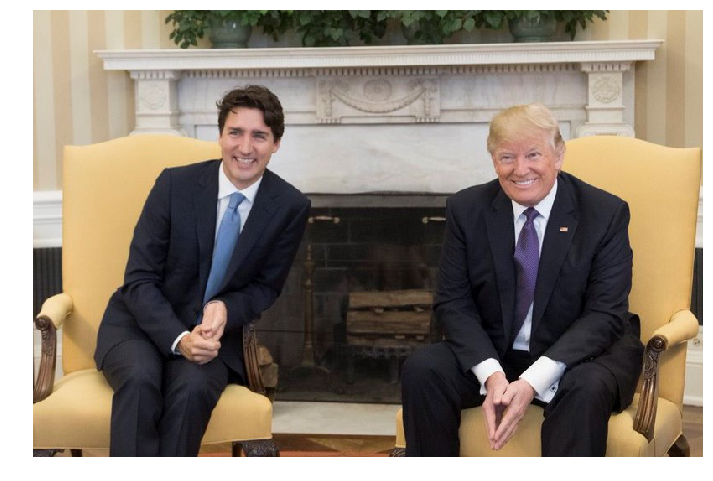

In [8]:
import cv2
trumptrudeau = cv2.imread("trumptrudeau.jpg")
plt_show(trumptrudeau)

Detect faces with Watson Visual Recognition
- age
- face location
- gender
- identity (removed since Feb 2018)

In [9]:
import json
trumptrudeau_url = "https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg"
tt_resp = sdk_vr.detect_faces(url=trumptrudeau_url)
pprint(tt_resp.result)

{'images': [{'faces': [{'age': {'max': 62, 'min': 59, 'score': 0.75315815},
                        'face_location': {'height': 84,
                                          'left': 546,
                                          'top': 145,
                                          'width': 87},
                        'gender': {'gender': 'MALE', 'score': 0.9172811}},
                       {'age': {'max': 36, 'min': 31, 'score': 0.5343688},
                        'face_location': {'height': 77,
                                          'left': 220,
                                          'top': 125,
                                          'width': 68},
                        'gender': {'gender': 'MALE', 'score': 0.99950147}}],
             'resolved_url': 'https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg',
             'source_url': 'https://upload.wikimedia.org/wikipedia/commons/7/76/Donald_Trump_Justin_Trudeau_2017-02-13_02.jpg

#### Plot image result from Watson

In [10]:
def plt_watson_result(image, resp):
    temp = image
    
    #Loop through each face detected by Watson
    for i in range(0,len(resp['images'][0]['faces'])):
        face = resp['images'][0]['faces'][i]
        faceloc = face['face_location']
        x, y ,w, h = faceloc['left'], faceloc['top'], faceloc['width'], faceloc['height']
        cv2.rectangle(temp, (x,y), (x + w, y + h), (0, 255, 0), 3)

        #If Watson can identify the faces:
        try:
            identity = str(face['identity']['name'])
            cv2.putText(temp, 
                            str(identity), 
                            (x - 10, y - 10), cv2.FONT_HERSHEY_PLAIN,
                            2,
                            (0, 255, 0), thickness = 3,)
        except:
            pass

        #If Watson can identify the age
        try:
            age_min = str(face['age']['min'])
            age_max = str(face['age']['max'])
            cv2.putText(temp, 
                    str("Age:" + age_min + "-" + age_max), 
                    (x - 10, y - 50), cv2.FONT_HERSHEY_PLAIN,
                    2,
                    (0, 255, 0), thickness = 3,)
        except:
            pass

        #If Watson can identify the gender:
        try:
            gender = str(face['gender']['gender'])
            cv2.putText(temp, 
                    str(gender), 
                    (x - 10, y - 90), cv2.FONT_HERSHEY_PLAIN,
                    2,
                    (0, 255, 0), thickness = 3,)
        except:
            pass
    
    plt_show(temp)

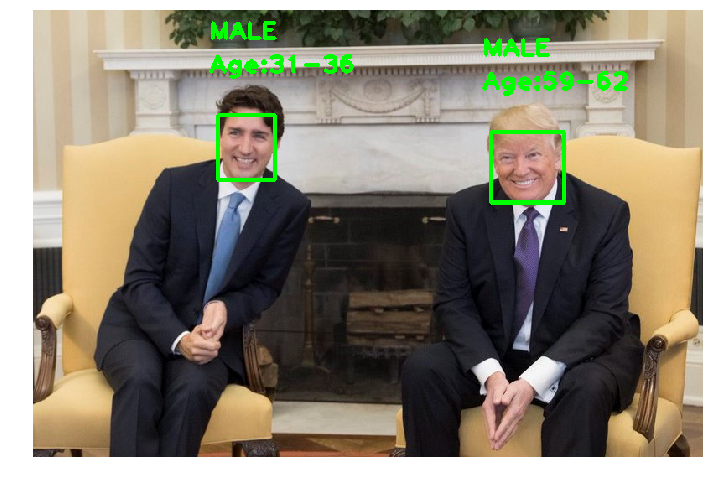

In [11]:
trumptrudeau = cv2.imread("trumptrudeau.jpg")
plt_watson_result(trumptrudeau, tt_resp.result)

#### Oleksandr & Co

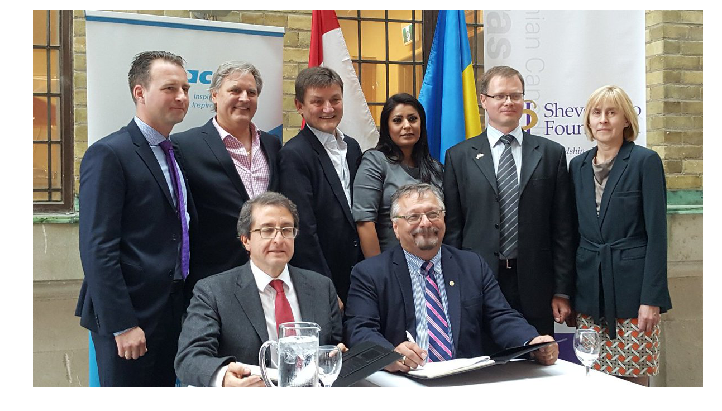

{'images': [{'faces': [{'age': {'max': 50, 'min': 43, 'score': 0.3764422},
                        'face_location': {'height': 82,
                                          'left': 486,
                                          'top': 135,
                                          'width': 70},
                        'gender': {'gender': 'MALE', 'score': 0.9397757}},
                       {'age': {'max': 36, 'min': 32, 'score': 0.5709615},
                        'face_location': {'height': 71,
                                          'left': 637,
                                          'top': 171,
                                          'width': 62},
                        'gender': {'gender': 'FEMALE', 'score': 0.99999404}},
                       {'age': {'max': 59, 'min': 55, 'score': 0.76102316},
                        'face_location': {'height': 90,
                                          'left': 651,
                                          'top': 336,
              

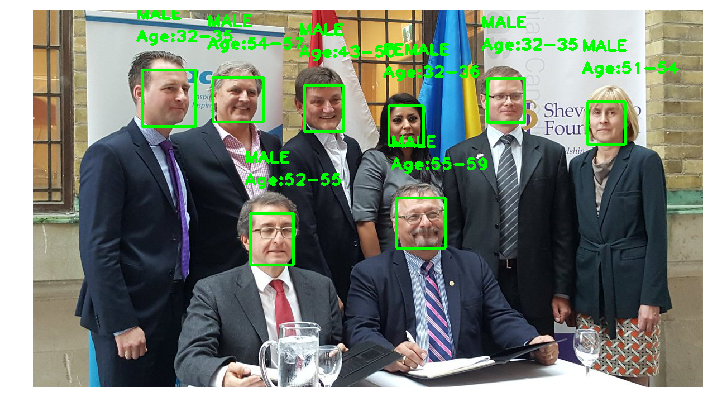

In [12]:
#ENTER URL:
image_url = "https://pbs.twimg.com/media/DB5814aU0AA2_Wb.jpg"

#ENTER FILENAME
filename = "myimage.jpg"

urllib.request.urlretrieve(image_url, filename)
myimage = cv2.imread(filename)
plt_show(myimage)
resp = sdk_vr.detect_faces(url=image_url)
pprint(resp.result)
plt_watson_result(myimage, resp.result)

Face on mars: 
https://upload.wikimedia.org/wikipedia/commons/3/38/Martian_face_viking.jpg

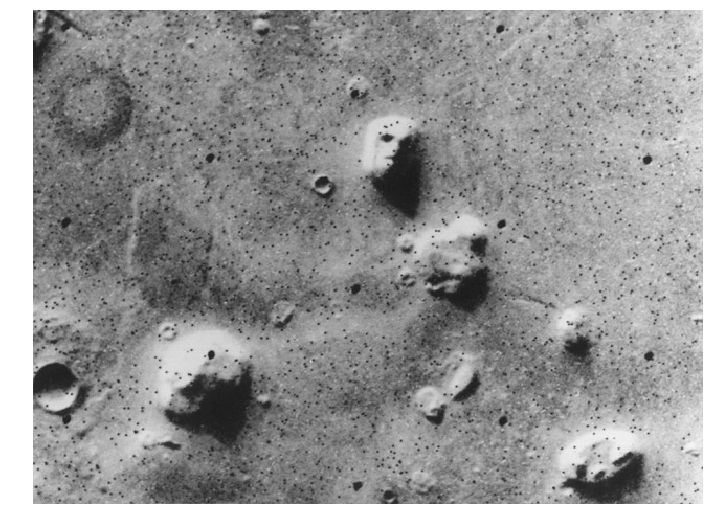

{'images': [{'faces': [{'age': {'max': 27, 'min': 23, 'score': 0.7003161},
                        'face_location': {'height': 37,
                                          'left': 324,
                                          'top': 115,
                                          'width': 27},
                        'gender': {'gender': 'MALE', 'score': 0.91474223}}],
             'resolved_url': 'https://upload.wikimedia.org/wikipedia/commons/3/38/Martian_face_viking.jpg',
             'source_url': 'https://upload.wikimedia.org/wikipedia/commons/3/38/Martian_face_viking.jpg'}],
 'images_processed': 1}


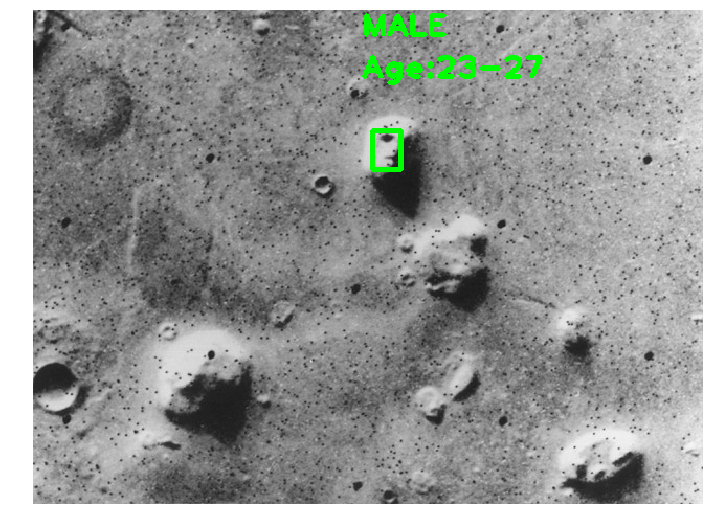

In [13]:
#ENTER URL:
image_url = "https://upload.wikimedia.org/wikipedia/commons/3/38/Martian_face_viking.jpg"
#ENTER FILENAME
filename = "myimage.jpg"

urllib.request.urlretrieve(image_url, filename)
myimage = cv2.imread(filename)
plt_show(myimage)
resp = sdk_vr.detect_faces(url=image_url)
pprint(resp.result)
plt_watson_result(myimage, resp.result)

### Classifying objects with Watson

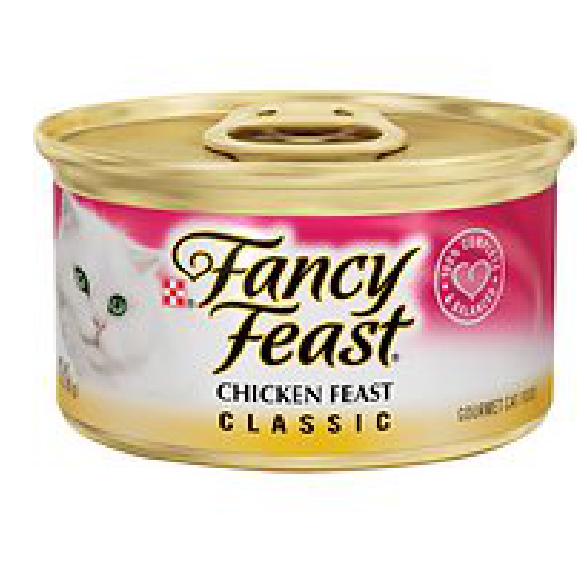

In [14]:
url = "https://img.chewy.com/is/catalog/76011_MAIN._AC_SS190_V1446845310_.jpg"
name = "catfood.jpg"

urllib.request.urlretrieve(url, name)

catfood = cv2.imread("catfood.jpg")

plt_show(catfood)

In [15]:
with open("catfood.jpg", "rb") as f:
    cf_resp = sdk_vr.classify(images_file=f)
    pprint(cf_resp.result)

{'custom_classes': 0,
 'images': [{'classifiers': [{'classes': [{'class': 'cat food',
                                           'score': 0.789,
                                           'type_hierarchy': '/food/feed/cat '
                                                             'food'},
                                          {'class': 'feed', 'score': 0.789},
                                          {'class': 'food', 'score': 0.927},
                                          {'class': 'canned food',
                                           'score': 0.652,
                                           'type_hierarchy': '/food/food '
                                                             'product/canned '
                                                             'food'},
                                          {'class': 'food product',
                                           'score': 0.789},
                                          {'class': 'formula',
           

### Image from webcam

In [16]:
!pip install imutils

#### Works if you run this notebook locally, otherwise it will produce an error (no webcam)

In [45]:
import imutils

def get_webcam_image(width=500):
    #function to take a photo
    camera = cv2.VideoCapture(0)
    cv2.waitKey(1000) #wait 1000ms to allow camera to auto-adjust exposure
    retval, im = camera.read()
    return im

saycheese = get_webcam_image()

cv2.imwrite(filename = "webcam.jpg", img = saycheese) #save to file

True

#### Read webcam.jpg image from file

In [17]:
saycheese = cv2.imread(filename = "webcam.jpg") # upload image locally if you are on the cloud

{'images': [{'faces': [{'age': {'max': 36, 'min': 30, 'score': 0.39847696},
                        'face_location': {'height': 206,
                                          'left': 323,
                                          'top': 110,
                                          'width': 171},
                        'gender': {'gender': 'MALE', 'score': 0.9613323}}],
             'image': 'webcam.jpg'}],
 'images_processed': 1}


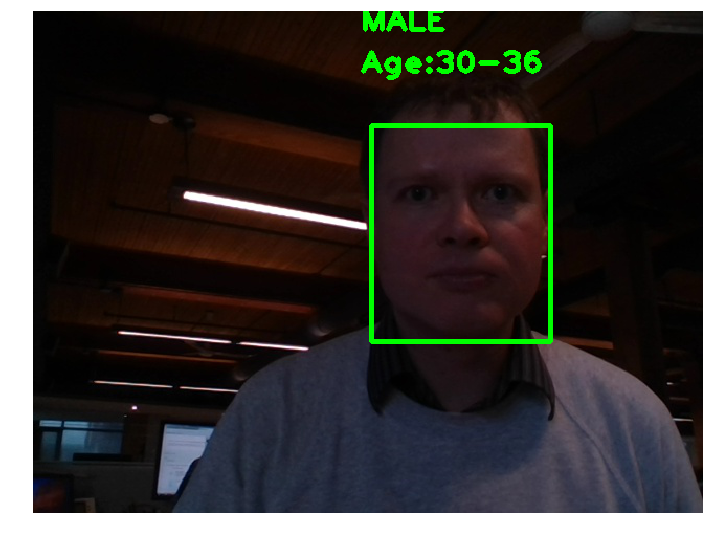

In [18]:
with open("webcam.jpg", "rb") as f:
    resp = sdk_vr.detect_faces(f)
    pprint(resp.result)
    plt_watson_result(saycheese, resp.result)

#### Check out the model on the Watson Visual Recognition Tool
> [Watson Visual Recognition Tool](https://cocl.us/watsonvrtool) (GUI interface)

### For more tutorials on Watson Visual Recognition:
- [Watson Visual Recognition](https://cocl.us/watsonvr)
- [Watson Visual Recognition Full Documentation](https://cocl.us/A9SOS)
- [Watson Visual Recognition Tool](https://cocl.us/watsonvrtool) (GUI interface)
- [Watson tagging videos](https://cocl.us/darkvision)
- [Tutorial: Create a robot using Raspberry Pi that you can talk to and that can recognize your face](https://cocl.us/tjbot)
- [Tile Localization technique / code](https://github.com/IBM-Bluemix/Visual-Recognition-Tile-Localization)
- [Using Watson Visual Recognition to detect seafood fraud](https://devpost.com/software/dory)
